## Identificando e removendo Outliers

In [27]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize= (14, 6))

In [28]:
dados = pd.read_csv('Dados/aluguel_residencial.csv', sep=';')

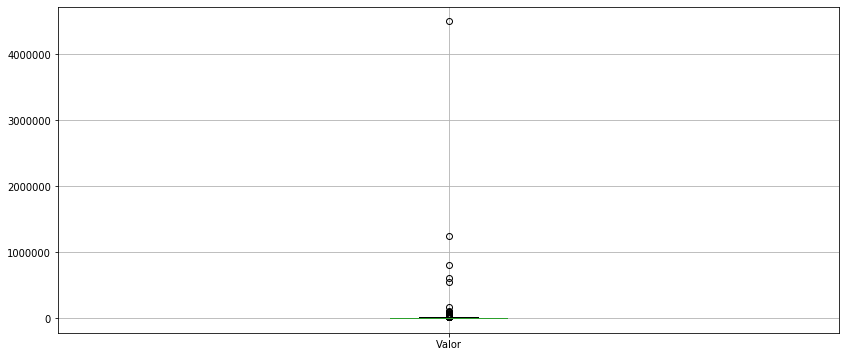

In [29]:
dados.boxplot(['Valor'])

In [30]:
dados[dados.Valor >=500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
7894,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0
11013,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,NaN
13099,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0
14325,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0
16056,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,NaN


In [31]:
valor = dados['Valor']

In [32]:
Q1 = valor.quantile(.25)
Q1

1500.0

In [33]:
Q3 = valor.quantile(.75)
Q3

5300.0

In [34]:
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q1 + 1.5 * IIQ

In [35]:
limite_inferior

-4200.0

In [36]:
limite_superior

7200.0

In [37]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
selecao

0        True
1        True
2        True
3        True
4        True
         ... 
22575    True
22576    True
22577    True
22578    True
22579    True
Name: Valor, Length: 22580, dtype: bool

In [38]:
dados_new = dados[selecao]
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


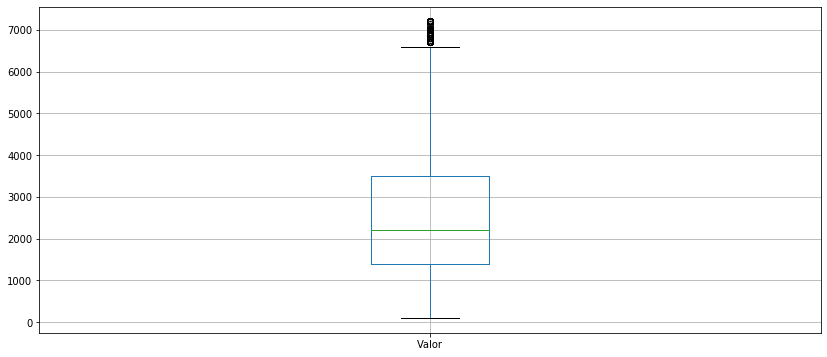

In [39]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D68BB74708>]],
      dtype=object)

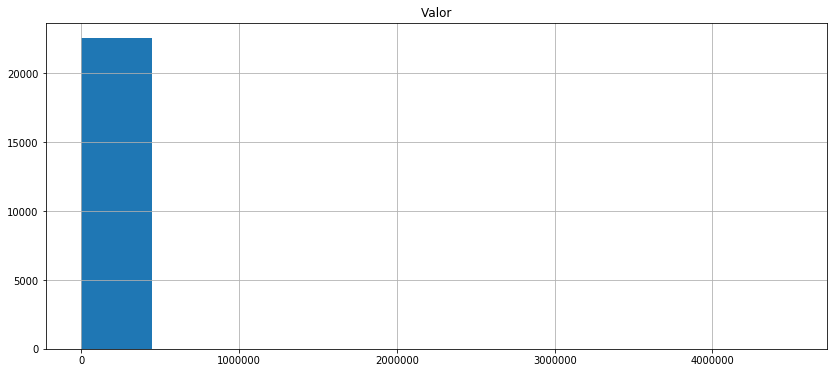

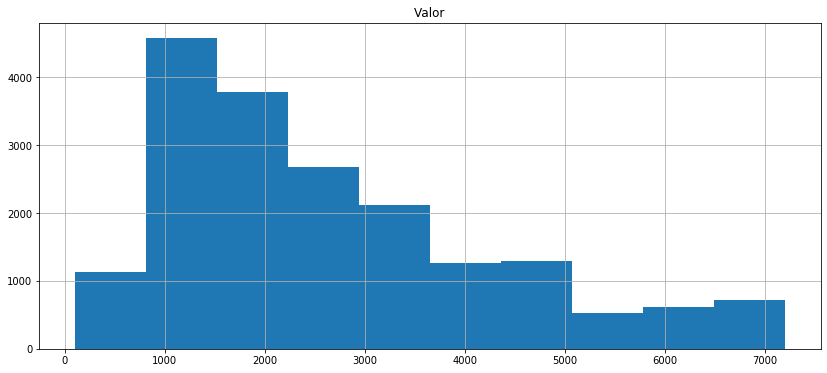

In [40]:
dados.hist(['Valor'])
dados_new.hist('Valor')

## Continuação

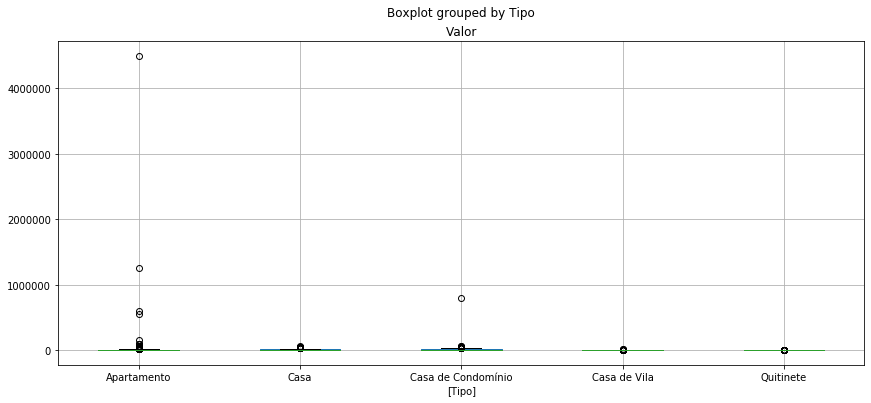

In [43]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [44]:
grupo_tipo = dados.groupby('Tipo')

In [52]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [53]:
#vizualizar em forma de dicionário
grupo_tipo.groups

{'Apartamento': Int64Index([    2,     3,     4,     5,     8,     9,    10,    11,    13,
                15,
             ...
             22567, 22568, 22570, 22571, 22572, 22573, 22575, 22577, 22578,
             22579],
            dtype='int64', length=19532),
 'Casa': Int64Index([    1,    24,    56,    60,   100,   104,   150,   166,   188,
               248,
             ...
             22332, 22357, 22365, 22420, 22425, 22452, 22510, 22535, 22547,
             22558],
            dtype='int64', length=967),
 'Casa de Condomínio': Int64Index([    6,     7,    14,    18,    44,    61,   172,   174,   191,
               217,
             ...
             22462, 22464, 22472, 22506, 22517, 22518, 22536, 22545, 22555,
             22574],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([   85,   222,   230,   314,   343,   718,   846,   868,   943,
              1042,
             ...
             21922, 21927, 21991, 22067, 22096, 22109, 22338, 22387, 22469

In [54]:
Q1 = grupo_tipo.quantile(.25)

Q3 = grupo_tipo.quantile(.75)

IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q1 + 1.5 * IIQ

In [55]:
limite_inferior

Tipo
Apartamento           -3500.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [56]:
limite_superior['Apartamento']

6700.0

In [57]:
#varre o dicionário trazendo a chave que é o tipo
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete
